In [4]:
import pandas as pd

In [5]:
df1=pd.read_csv("/content/drive/MyDrive/Energy Demand/energy_dataset.csv")

In [6]:
df2=pd.read_csv("/content/drive/MyDrive/Energy Demand/weather_features.csv")

In [7]:
df1.head(5)

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [8]:
df2.head(5)

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [47]:
from sklearn.preprocessing import LabelEncoder

weather_main_encoder = LabelEncoder()
df['weather_main_encoded'] = weather_main_encoder.fit_transform(df['weather_main'])

# Display the mapping between original categories and encoded values
mapping = dict(zip(weather_main_encoder.classes_, weather_main_encoder.transform(weather_main_encoder.classes_)))
print("Mapping:", mapping)


Mapping: {'clear': 0, 'clouds': 1, 'drizzle': 2, 'dust': 3, 'fog': 4, 'haze': 5, 'mist': 6, 'rain': 7, 'smoke': 8, 'snow': 9, 'squall': 10, 'thunderstorm': 11}


In [48]:
from sklearn.preprocessing import LabelEncoder

weather_desc_encoder = LabelEncoder()
df['weather_description_encoded'] = weather_desc_encoder.fit_transform(df['weather_description'])

# Display the mapping between original categories and encoded values
mapping_desc = dict(zip(weather_desc_encoder.classes_, weather_desc_encoder.transform(weather_desc_encoder.classes_)))
print("Mapping for weather_description:", mapping_desc)


Mapping for weather_description: {'broken clouds': 0, 'drizzle': 1, 'dust': 2, 'few clouds': 3, 'fog': 4, 'haze': 5, 'heavy intensity drizzle': 6, 'heavy intensity rain': 7, 'heavy intensity shower rain': 8, 'heavy snow': 9, 'light intensity drizzle': 10, 'light intensity drizzle rain': 11, 'light intensity shower rain': 12, 'light rain': 13, 'light rain and snow': 14, 'light shower sleet': 15, 'light shower snow': 16, 'light snow': 17, 'light thunderstorm': 18, 'mist': 19, 'moderate rain': 20, 'overcast clouds': 21, 'proximity drizzle': 22, 'proximity moderate rain': 23, 'proximity shower rain': 24, 'proximity thunderstorm': 25, 'ragged shower rain': 26, 'rain and drizzle': 27, 'rain and snow': 28, 'sand dust whirls': 29, 'scattered clouds': 30, 'shower rain': 31, 'shower sleet': 32, 'sky is clear': 33, 'sleet': 34, 'smoke': 35, 'snow': 36, 'squalls': 37, 'thunderstorm': 38, 'thunderstorm with heavy rain': 39, 'thunderstorm with light rain': 40, 'thunderstorm with rain': 41, 'very hea

In [45]:
df['clouds_all'].value_counts()

0     82194
20    31002
75    21940
40    13668
92     4380
      ...  
39        2
19        2
11        1
96        1
93        1
Name: clouds_all, Length: 97, dtype: int64

In [34]:
df2['weather_id'].describe()

count    178396.000000
mean        759.831902
std         108.733223
min         200.000000
25%         800.000000
50%         800.000000
75%         801.000000
max         804.000000
Name: weather_id, dtype: float64

In [36]:
df['weather_main'].value_counts()

clear           82685
clouds          68055
rain            17391
mist             3908
fog              2506
drizzle          1724
thunderstorm     1041
haze              435
dust              347
snow              270
smoke              33
squall              1
Name: weather_main, dtype: int64

In [38]:
df2['weather_icon'].value_counts()

01n    38541
01d    34830
02d    19199
02n    12368
04d     9137
04n     8403
03d     7870
10n     5951
01      5946
03n     5833
10      4917
10d     4882
50n     4288
02      3902
50d     2942
04      2469
03      2242
09d     1976
09n     1389
11d      624
11n      417
13d      130
13n      103
13        37
Name: weather_icon, dtype: int64

In [35]:
df2['weather_description'].value_counts()

sky is clear                    82685
few clouds                      32101
broken clouds                   17448
scattered clouds                15945
light rain                      10905
mist                             3908
moderate rain                    3621
overcast clouds                  2561
fog                              2506
light intensity drizzle          1241
heavy intensity rain             1142
light intensity shower rain       657
proximity thunderstorm            480
proximity shower rain             476
haze                              435
shower rain                       426
drizzle                           369
dust                              345
thunderstorm                      309
light snow                        140
thunderstorm with rain            127
thunderstorm with light rain       92
heavy intensity shower rain        81
light intensity drizzle rain       79
very heavy rain                    78
snow                               74
smoke       

In [9]:
df2["city_name"].unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

In [10]:
df1.columns,df2.columns

(Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
        'generation fossil coal-derived gas', 'generation fossil gas',
        'generation fossil hard coal', 'generation fossil oil',
        'generation fossil oil shale', 'generation fossil peat',
        'generation geothermal', 'generation hydro pumped storage aggregated',
        'generation hydro pumped storage consumption',
        'generation hydro run-of-river and poundage',
        'generation hydro water reservoir', 'generation marine',
        'generation nuclear', 'generation other', 'generation other renewable',
        'generation solar', 'generation waste', 'generation wind offshore',
        'generation wind onshore', 'forecast solar day ahead',
        'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
        'total load forecast', 'total load actual', 'price day ahead',
        'price actual'],
       dtype='object'),
 Index(['dt_iso', 'city_name', 'temp', 'temp_min',

In [11]:
df1.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [12]:
df2.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [13]:
df1.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

In [14]:
df2.describe()

temp       temp_min       temp_max      pressure  \
count  178396.000000  178396.000000  178396.000000  1.783960e+05   
mean      289.618605     288.330442     291.091267  1.069261e+03   
std         8.026199       7.955491       8.612454  5.969632e+03   
min       262.240000     262.240000     262.240000  0.000000e+00   
25%       283.670000     282.483602     284.650000  1.013000e+03   
50%       289.150000     288.150000     290.150000  1.018000e+03   
75%       295.150000     293.730125     297.150000  1.022000e+03   
max       315.600000     315.150000     321.150000  1.008371e+06   

            humidity    wind_speed       wind_deg        rain_1h  \
count  178396.000000  178396.00000  178396.000000  178396.000000   
mean       68.423457       2.47056     166.591190       0.075492   
std        21.902888       2.09591     116.611927       0.398847   
min         0.000000       0.00000       0.000000       0.000000   
25%        53.000000       1.00000      55.000000       0.000000   
50%        72.000000       2.00000     177.000000       0.000000   
75%        87.000000       4.00000     270.000000       0.000000   
max       100.000000     133.00000     360.000000      12.000000   

             rain_3h        snow_3h     clouds_all     weather_id  
count  178396.000000  178396.000000  178396.000000  178396.000000  
mean        0.000380       0.004763      25.073292     759.831902  
std         0.007288       0.222604      30.774129     108.733223  
min         0.000000       0.000000       0.000000     200.000000  
25%         0.000000       0.000000       0.000000     800.000000  
50%         0.000000       0.000000      20.000000     800.000000  
75%         0.000000       0.000000      40.000000     801.000000  
max         2.315000      21.500000     100.000000     804.000000

In [15]:
df1['time']=pd.to_datetime(df1['time'])

In [16]:
# Check the data type of the 'time' column
print(df1['time'].dtype)

# Print unique values in the 'time' column
print(df1['time'].unique())


object
[datetime.datetime(2015, 1, 1, 0, 0, tzinfo=tzoffset(None, 3600))
 datetime.datetime(2015, 1, 1, 1, 0, tzinfo=tzoffset(None, 3600))
 datetime.datetime(2015, 1, 1, 2, 0, tzinfo=tzoffset(None, 3600)) ...
 datetime.datetime(2018, 12, 31, 21, 0, tzinfo=tzoffset(None, 3600))
 datetime.datetime(2018, 12, 31, 22, 0, tzinfo=tzoffset(None, 3600))
 datetime.datetime(2018, 12, 31, 23, 0, tzinfo=tzoffset(None, 3600))]


In [17]:
# Extract the year without using .dt accessor
unique_years = df1['time'].apply(lambda x: x.year).unique()
print(unique_years)

[2015 2016 2017 2018]


In [18]:
df1['time'].apply(lambda x: x.month).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [19]:
df1['time'].apply(lambda x: x.day).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [20]:
df2

dt_iso city_name     temp  temp_min  temp_max  \
0       2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475   
1       2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475   
2       2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686   
3       2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686   
4       2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686   
...                           ...       ...      ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  287.760   287.150   288.150   
178392  2018-12-31 20:00:00+01:00   Seville  285.760   285.150   286.150   
178393  2018-12-31 21:00:00+01:00   Seville  285.150   285.150   285.150   
178394  2018-12-31 22:00:00+01:00   Seville  284.150   284.150   284.150   
178395  2018-12-31 23:00:00+01:00   Seville  283.970   282.150   285.150   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0           1001        77           1        62      0.0      0.0      0.0   
1           1001        77           1        62      0.0      0.0      0.0   
2           1002        78           0        23      0.0      0.0      0.0   
3           1002        78           0        23      0.0      0.0      0.0   
4           1002        78           0        23      0.0      0.0      0.0   
...          ...       ...         ...       ...      ...      ...      ...   
178391      1028        54           3        30      0.0      0.0      0.0   
178392      1029        62           3        30      0.0      0.0      0.0   
178393      1028        58           4        50      0.0      0.0      0.0   
178394      1029        57           4        60      0.0      0.0      0.0   
178395      1029        70           3        50      0.0      0.0      0.0   

        clouds_all  weather_id weather_main weather_description weather_icon  
0                0         800        clear        sky is clear          01n  
1                0         800        clear        sky is clear          01n  
2                0         800        clear        sky is clear          01n  
3                0         800        clear        sky is clear          01n  
4                0         800        clear        sky is clear          01n  
...            ...         ...          ...                 ...          ...  
178391           0         800        clear        sky is clear          01n  
178392           0         800        clear        sky is clear          01n  
178393           0         800        clear        sky is clear          01n  
178394           0         800        clear        sky is clear          01n  
178395           0         800        clear        sky is clear          01n  

[178396 rows x 17 columns]

In [21]:
df2['dt_iso'] = pd.to_datetime(df2['dt_iso'])

In [22]:
# Numeric columns
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

# Non-numeric columns
non_numeric_columns = df1.select_dtypes(exclude=['float64', 'int64']).columns
df1[non_numeric_columns] = df1[non_numeric_columns].fillna(df1[non_numeric_columns].mode().iloc[0])


In [23]:
# Numeric columns
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())

# Non-numeric columns
non_numeric_columns = df2.select_dtypes(exclude=['float64', 'int64']).columns
df2[non_numeric_columns] = df2[non_numeric_columns].fillna(df2[non_numeric_columns].mode().iloc[0])

In [24]:
df1["generation hydro pumped storage aggregated"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: generation hydro pumped storage aggregated, dtype: float64

In [25]:
df1.isnull().sum(),df2.isnull().sum()

(time                                               0
 generation biomass                                 0
 generation fossil brown coal/lignite               0
 generation fossil coal-derived gas                 0
 generation fossil gas                              0
 generation fossil hard coal                        0
 generation fossil oil                              0
 generation fossil oil shale                        0
 generation fossil peat                             0
 generation geothermal                              0
 generation hydro pumped storage aggregated     35064
 generation hydro pumped storage consumption        0
 generation hydro run-of-river and poundage         0
 generation hydro water reservoir                   0
 generation marine                                  0
 generation nuclear                                 0
 generation other                                   0
 generation other renewable                         0
 generation solar           

In [26]:
df1["generation hydro pumped storage aggregated"].fillna(0, inplace=True)

In [27]:
df1['forecast wind offshore eday ahead'].fillna(0, inplace=True)

In [28]:
df1.isnull().sum(),df2.isnull().sum()

(time                                           0
 generation biomass                             0
 generation fossil brown coal/lignite           0
 generation fossil coal-derived gas             0
 generation fossil gas                          0
 generation fossil hard coal                    0
 generation fossil oil                          0
 generation fossil oil shale                    0
 generation fossil peat                         0
 generation geothermal                          0
 generation hydro pumped storage aggregated     0
 generation hydro pumped storage consumption    0
 generation hydro run-of-river and poundage     0
 generation hydro water reservoir               0
 generation marine                              0
 generation nuclear                             0
 generation other                               0
 generation other renewable                     0
 generation solar                               0
 generation waste                               0


In [51]:
df['wind_deg'].unique()

array([ 62, 309, 226,  58,  21, 229,  23, 273, 224,  48,  27, 225, 221,
       321, 240,  32,  57, 222, 307, 329, 219, 353, 218, 212, 255, 344,
       213, 272,  55, 209, 196, 248,  15, 194, 275,  53, 242,  24, 184,
       263,  52, 230, 108, 267,  47,  92, 177, 250, 216, 150, 180,  44,
       235, 156, 198, 260,  51, 220, 256,  45, 239, 266, 201, 265, 254,
       296,  33, 314, 338, 264, 236, 284,  13, 257, 289,   5, 245, 311,
        56, 231, 234, 308, 354, 291, 253, 333, 215, 276, 258, 324, 310,
       227, 323, 199, 274, 262, 336, 206, 285, 190, 271, 204, 175, 306,
        54,  14, 208, 328, 193, 322,  61, 192, 119, 305, 261, 210, 138,
       319, 191, 232,  64, 223, 217, 241, 279,  50, 299,  46, 318,  43,
       286,  36,  38, 294,  67, 278,  94, 269,  29,  22,  66,  49, 214,
         0, 282,  59, 233, 337, 315,  60, 112, 135, 331, 202, 157, 207,
       327, 200, 130, 295, 197, 173, 132, 195,  90, 167,  19,  95,  16,
       176, 168,  99, 182, 169, 349, 163, 317, 160,  68, 165, 16

In [29]:
df1.shape , df2.shape

((35064, 29), (178396, 17))

In [30]:
df1['time'].nunique(), df2['dt_iso'].nunique()

(35064, 35064)

In [31]:
# Import necessary libraries
import pandas as pd

# Assuming 'dt_iso' is the column name you want to replace with 'time' in df2
df2.rename(columns={'dt_iso': 'time'}, inplace=True)

# Display the updated DataFrame
print(df2.head())


                        time city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_i

In [32]:
df=pd.merge(df1,df2, on ='time',how='inner')

In [33]:
df

time  generation biomass  \
0       2015-01-01 00:00:00+01:00               447.0   
1       2015-01-01 00:00:00+01:00               447.0   
2       2015-01-01 00:00:00+01:00               447.0   
3       2015-01-01 00:00:00+01:00               447.0   
4       2015-01-01 00:00:00+01:00               447.0   
...                           ...                 ...   
178391  2018-12-31 23:00:00+01:00               290.0   
178392  2018-12-31 23:00:00+01:00               290.0   
178393  2018-12-31 23:00:00+01:00               290.0   
178394  2018-12-31 23:00:00+01:00               290.0   
178395  2018-12-31 23:00:00+01:00               290.0   

        generation fossil brown coal/lignite  \
0                                      329.0   
1                                      329.0   
2                                      329.0   
3                                      329.0   
4                                      329.0   
...                                      ...   
178391                                   0.0   
178392                                   0.0   
178393                                   0.0   
178394                                   0.0   
178395                                   0.0   

        generation fossil coal-derived gas  generation fossil gas  \
0                                      0.0                 4844.0   
1                                      0.0                 4844.0   
2                                      0.0                 4844.0   
3                                      0.0                 4844.0   
4                                      0.0                 4844.0   
...                                    ...                    ...   
178391                                 0.0                 6926.0   
178392                                 0.0                 6926.0   
178393                                 0.0                 6926.0   
178394                                 0.0                 6926.0   
178395                                 0.0                 6926.0   

        generation fossil hard coal  generation fossil oil  \
0                            4821.0                  162.0   
1                            4821.0                  162.0   
2                            4821.0                  162.0   
3                            4821.0                  162.0   
4                            4821.0                  162.0   
...                             ...                    ...   
178391                       2166.0                  163.0   
178392                       2166.0                  163.0   
178393                       2166.0                  163.0   
178394                       2166.0                  163.0   
178395                       2166.0                  163.0   

        generation fossil oil shale  generation fossil peat  \
0                               0.0                     0.0   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   
...                             ...                     ...   
178391                          0.0                     0.0   
178392                          0.0                     0.0   
178393                          0.0                     0.0   
178394                          0.0                     0.0   
178395                          0.0                     0.0   

        generation geothermal  ...  wind_speed  wind_deg  rain_1h  rain_3h  \
0                         0.0  ...           1        62      0.0      0.0   
1                         0.0  ...           1       309      0.0      0.0   
2                         0.0  ...           0       226      0.0      0.0   
3                         0.0  ...           7        58      0.0      0.0   
4                         0.0  ...           1

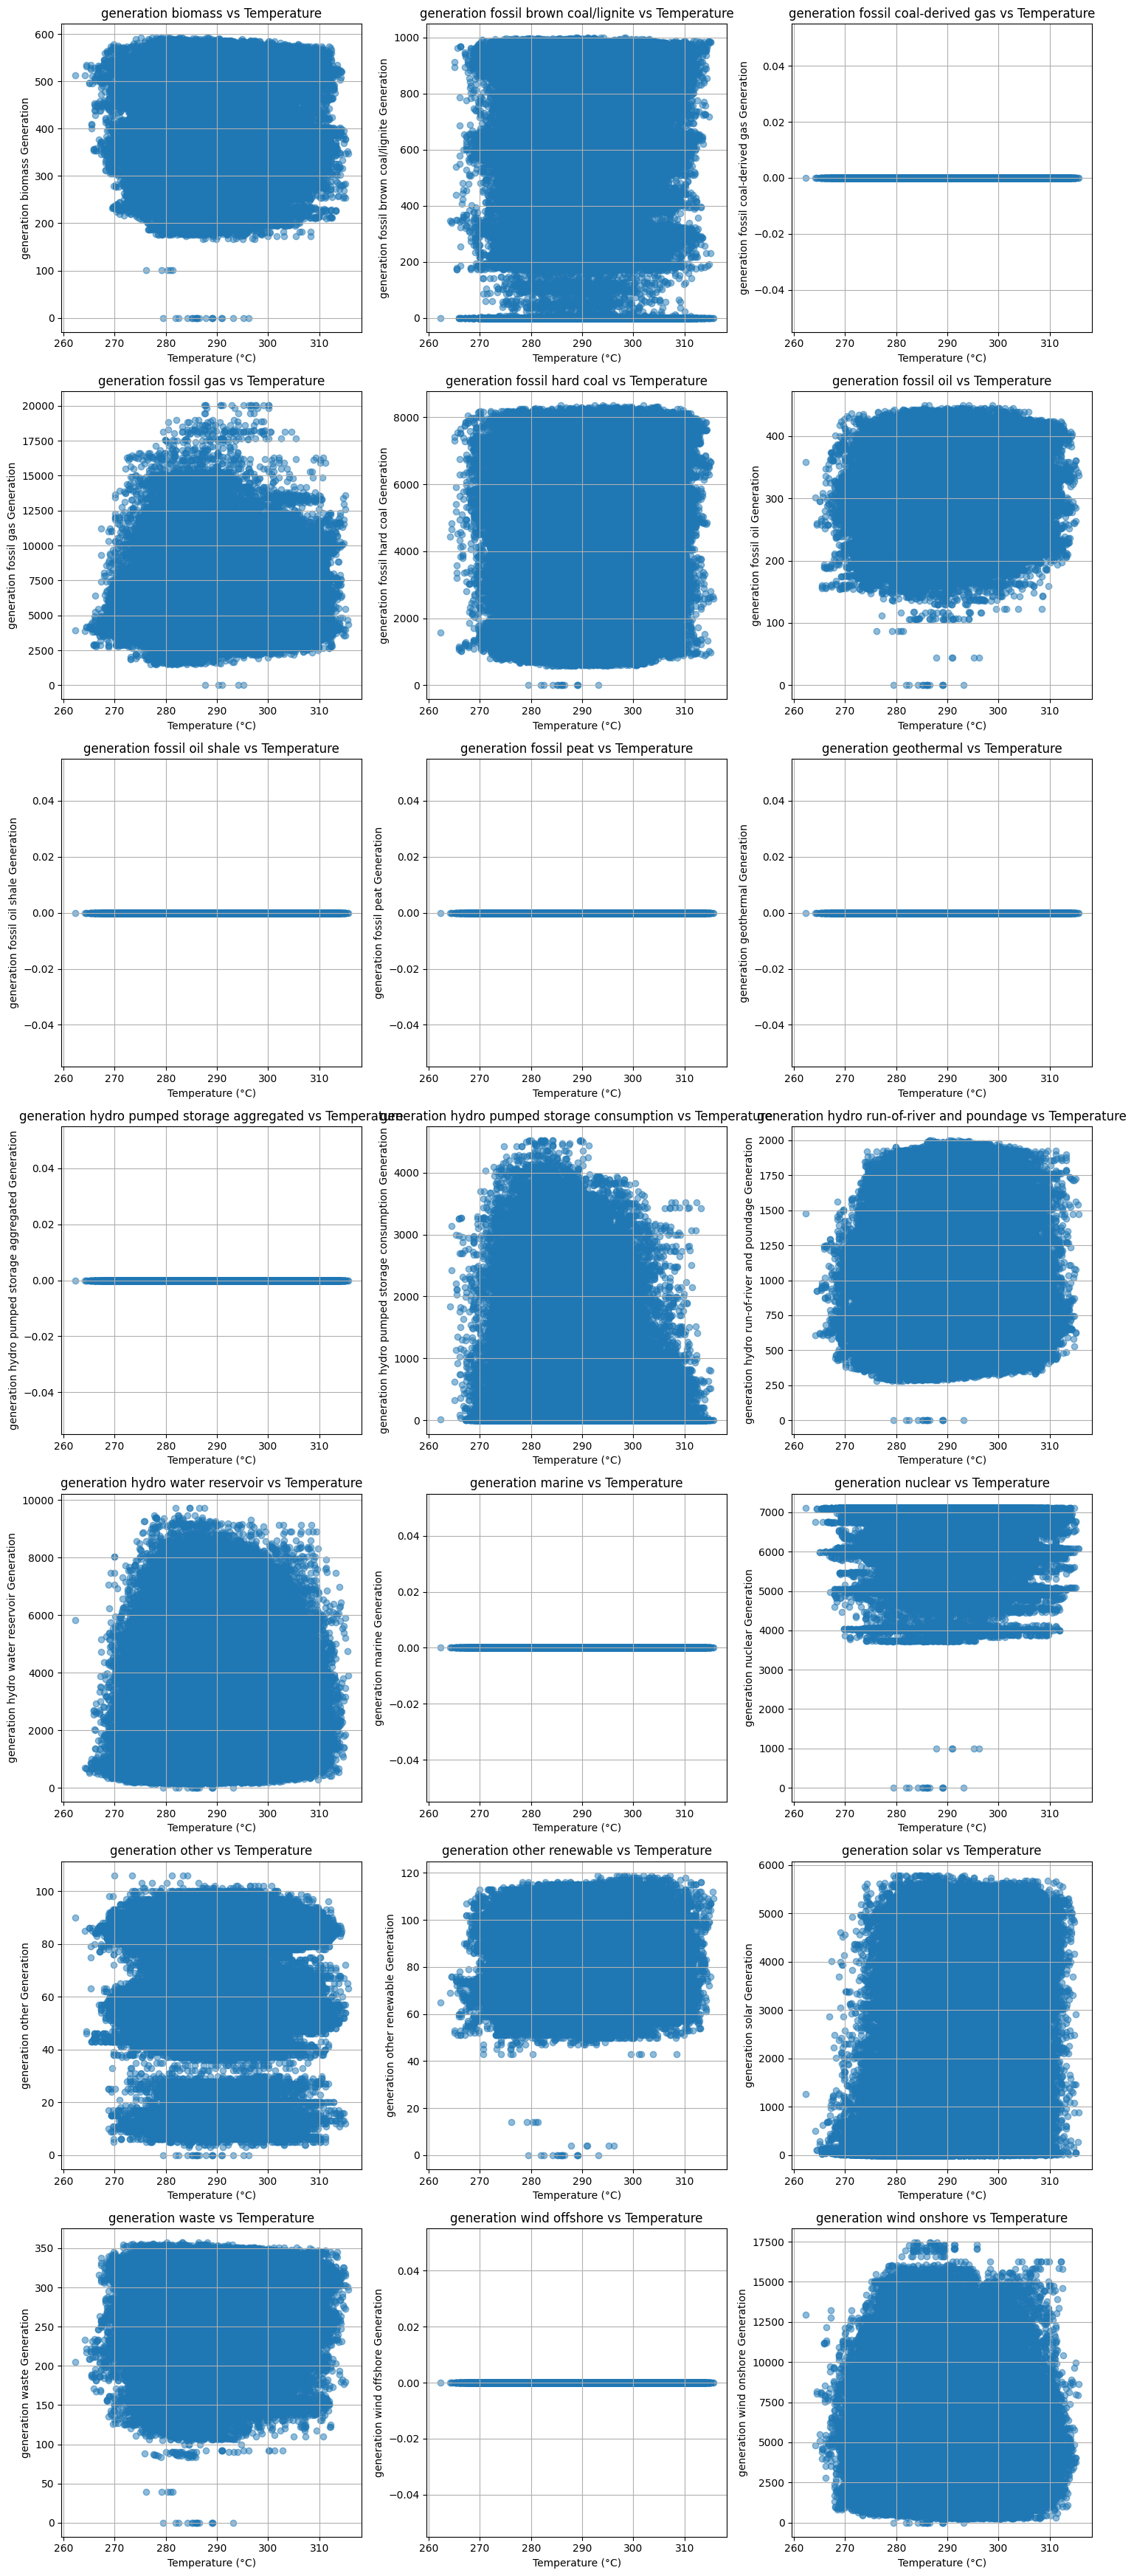

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant columns
energy_columns = ['generation biomass', 'generation fossil brown coal/lignite',
                  'generation fossil coal-derived gas', 'generation fossil gas',
                  'generation fossil hard coal', 'generation fossil oil',
                  'generation fossil oil shale', 'generation fossil peat',
                  'generation geothermal', 'generation hydro pumped storage aggregated',
                  'generation hydro pumped storage consumption',
                  'generation hydro run-of-river and poundage',
                  'generation hydro water reservoir', 'generation marine',
                  'generation nuclear', 'generation other', 'generation other renewable',
                  'generation solar', 'generation waste', 'generation wind offshore',
                  'generation wind onshore']

weather_columns = ['temp']

# Number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(energy_columns) + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot energy generation vs temperature for each energy type
for i, energy_column in enumerate(energy_columns):
    ax = axes[i]
    ax.scatter(df[weather_columns], df[energy_column], alpha=0.5)
    ax.set_title(f'{energy_column} vs Temperature')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel(f'{energy_column} Generation')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


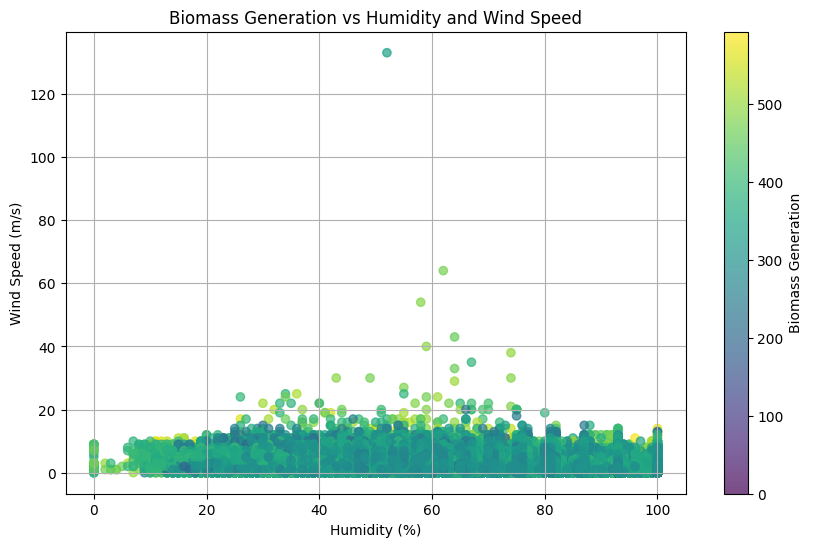

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant columns
biomass_column = 'generation biomass'
humidity_column = 'humidity'
wind_speed_column = 'wind_speed'

# Create a scatter plot for Biomass Generation against humidity and wind speed
plt.figure(figsize=(10, 6))
plt.scatter(df[humidity_column], df[wind_speed_column], c=df[biomass_column], cmap='viridis', alpha=0.7)
plt.colorbar(label='Biomass Generation')
plt.title('Biomass Generation vs Humidity and Wind Speed')
plt.xlabel('Humidity (%)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()


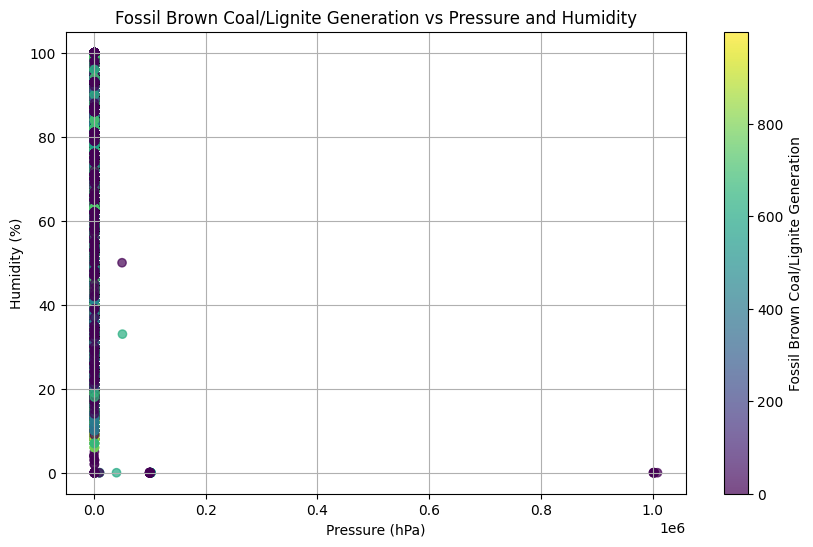

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant columns
brown_coal_column = 'generation fossil brown coal/lignite'
pressure_column = 'pressure'
humidity_column = 'humidity'

# Create a scatter plot for Brown Coal/Lignite Generation against pressure and humidity
plt.figure(figsize=(10, 6))
plt.scatter(df[pressure_column], df[humidity_column], c=df[brown_coal_column], cmap='viridis', alpha=0.7)
plt.colorbar(label='Fossil Brown Coal/Lignite Generation')
plt.title('Fossil Brown Coal/Lignite Generation vs Pressure and Humidity')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()


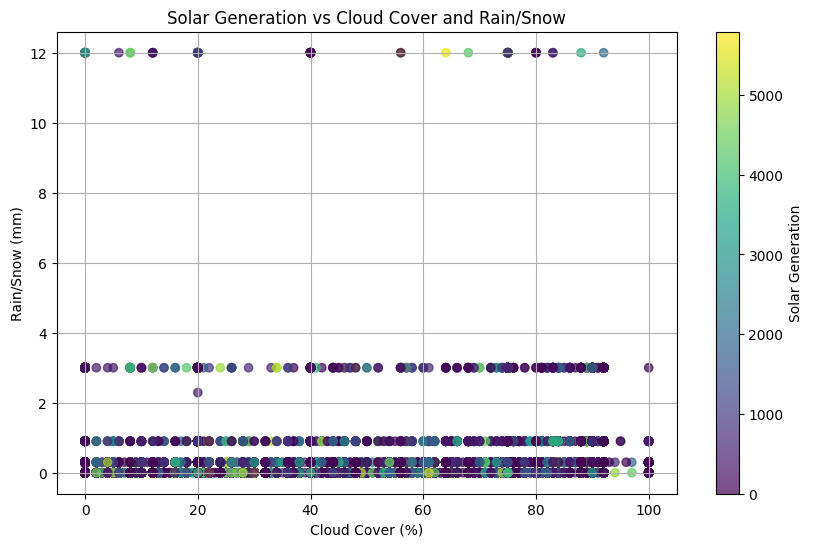

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant columns
solar_column = 'generation solar'
cloud_cover_column = 'clouds_all'
rain_snow_column = 'rain_1h'  # You can choose 'rain_3h' or 'snow_3h' based on your data

# Create a scatter plot for Solar Generation against cloud cover and rain/snow
plt.figure(figsize=(10, 6))
plt.scatter(df[cloud_cover_column], df[rain_snow_column], c=df[solar_column], cmap='viridis', alpha=0.7)
plt.colorbar(label='Solar Generation')
plt.title('Solar Generation vs Cloud Cover and Rain/Snow')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Rain/Snow (mm)')
plt.grid(True)
plt.show()


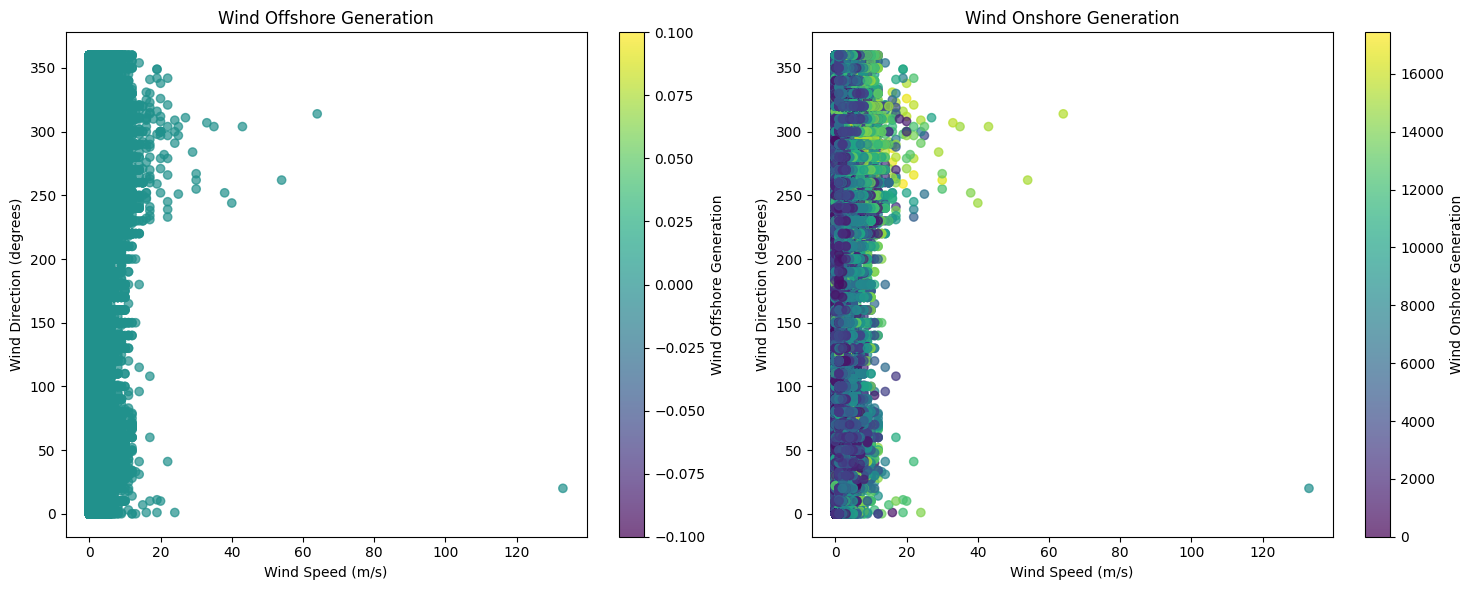

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant columns
wind_offshore_column = 'generation wind offshore'
wind_onshore_column = 'generation wind onshore'
wind_speed_column = 'wind_speed'
wind_direction_column = 'wind_deg'

# Create a scatter plot for Wind Offshore and Onshore Generation against wind speed and wind direction
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Wind Offshore
sc1 = axes[0].scatter(df[wind_speed_column], df[wind_direction_column], c=df[wind_offshore_column], cmap='viridis', alpha=0.7)
axes[0].set_title('Wind Offshore Generation')
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('Wind Direction (degrees)')
fig.colorbar(sc1, ax=axes[0], label='Wind Offshore Generation')

# Wind Onshore
sc2 = axes[1].scatter(df[wind_speed_column], df[wind_direction_column], c=df[wind_onshore_column], cmap='viridis', alpha=0.7)
axes[1].set_title('Wind Onshore Generation')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Wind Direction (degrees)')
fig.colorbar(sc2, ax=axes[1], label='Wind Onshore Generation')

plt.tight_layout()
plt.show()


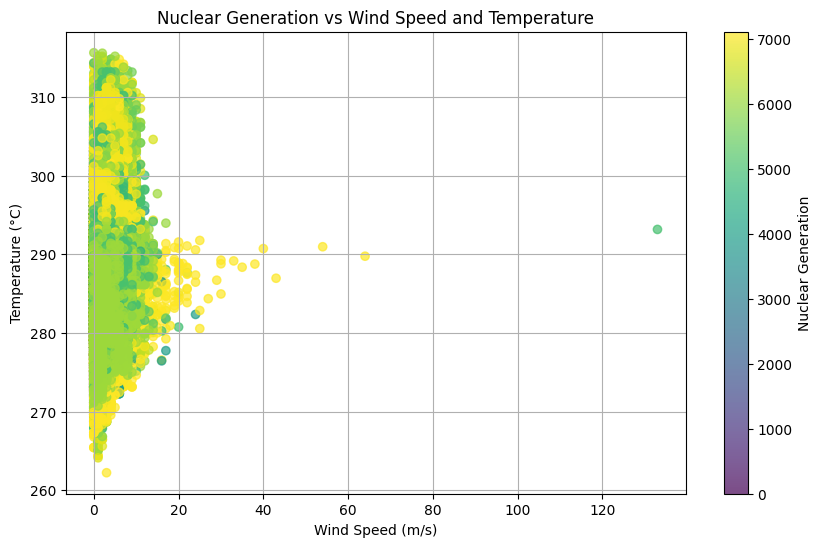

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant columns
nuclear_column = 'generation nuclear'
wind_speed_column = 'wind_speed'
temperature_column = 'temp'

# Create a scatter plot for Nuclear Generation against wind speed and temperature
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(df[wind_speed_column], df[temperature_column], c=df[nuclear_column], cmap='viridis', alpha=0.7)
plt.colorbar(label='Nuclear Generation')
plt.title('Nuclear Generation vs Wind Speed and Temperature')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

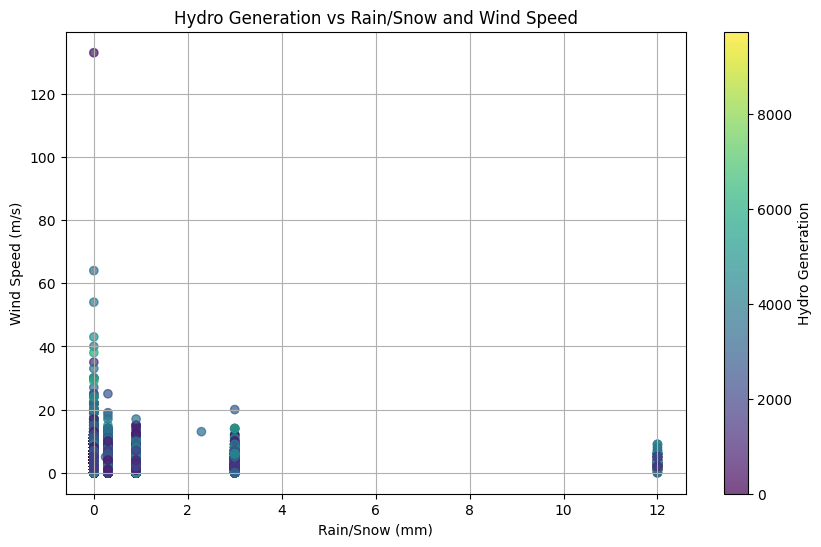

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant columns
hydro_column = 'generation hydro water reservoir'
rain_snow_column = 'rain_1h'  # You can choose 'rain_3h' or 'snow_3h' based on your data
wind_speed_column = 'wind_speed'

# Create a scatter plot for Hydro Generation against rain/snow and wind speed
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(df[rain_snow_column], df[wind_speed_column], c=df[hydro_column], cmap='viridis', alpha=0.7)
plt.colorbar(label='Hydro Generation')
plt.title('Hydro Generation vs Rain/Snow and Wind Speed')
plt.xlabel('Rain/Snow (mm)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()


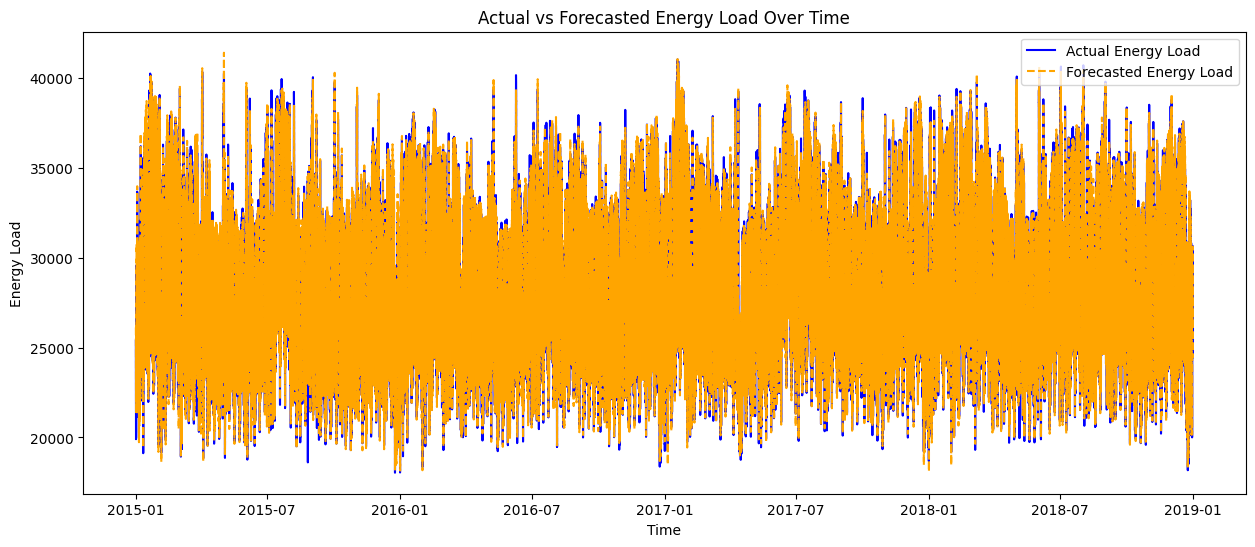

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['total load actual'], label='Actual Energy Load', color='blue')
plt.plot(df['time'], df['total load forecast'], label='Forecasted Energy Load', linestyle='dashed', color='orange')
plt.title('Actual vs Forecasted Energy Load Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Load')
plt.legend()
plt.show()


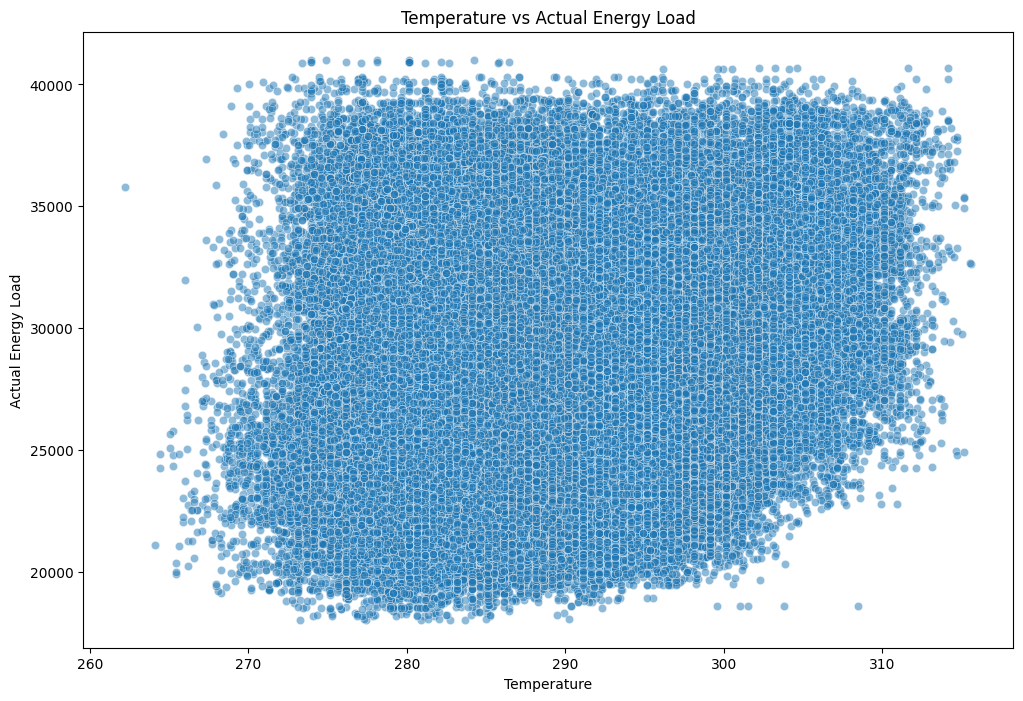

In [ ]:
import seaborn as sns

# Assuming 'time' is the index in both DataFrames
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp', y='total load actual', data=df, alpha=0.5)
plt.title('Temperature vs Actual Energy Load')
plt.xlabel('Temperature')
plt.ylabel('Actual Energy Load')
plt.show()


<ipython-input-34-869ded231e28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})


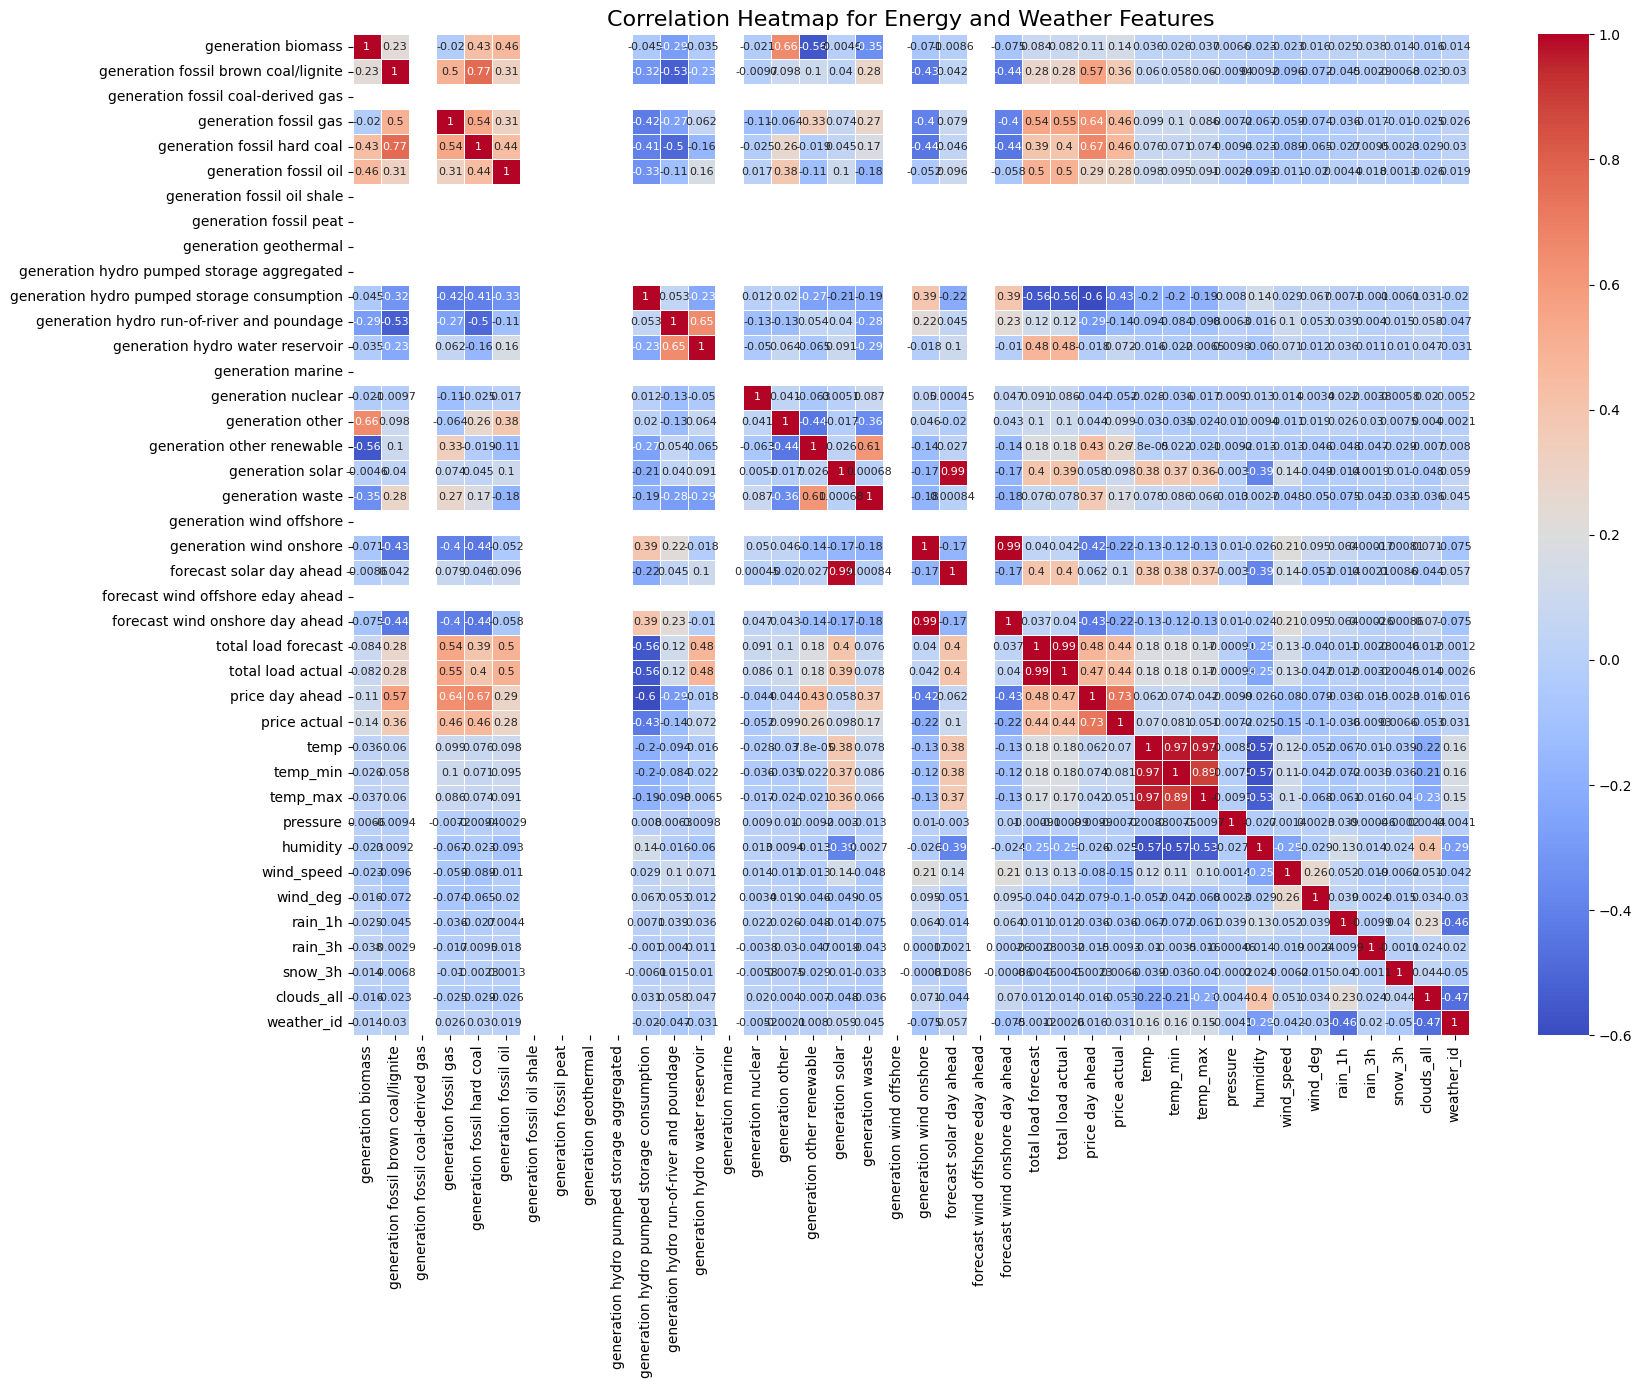

In [ ]:
plt.figure(figsize=(18, 13))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for Energy and Weather Features', fontsize=16)
plt.show()


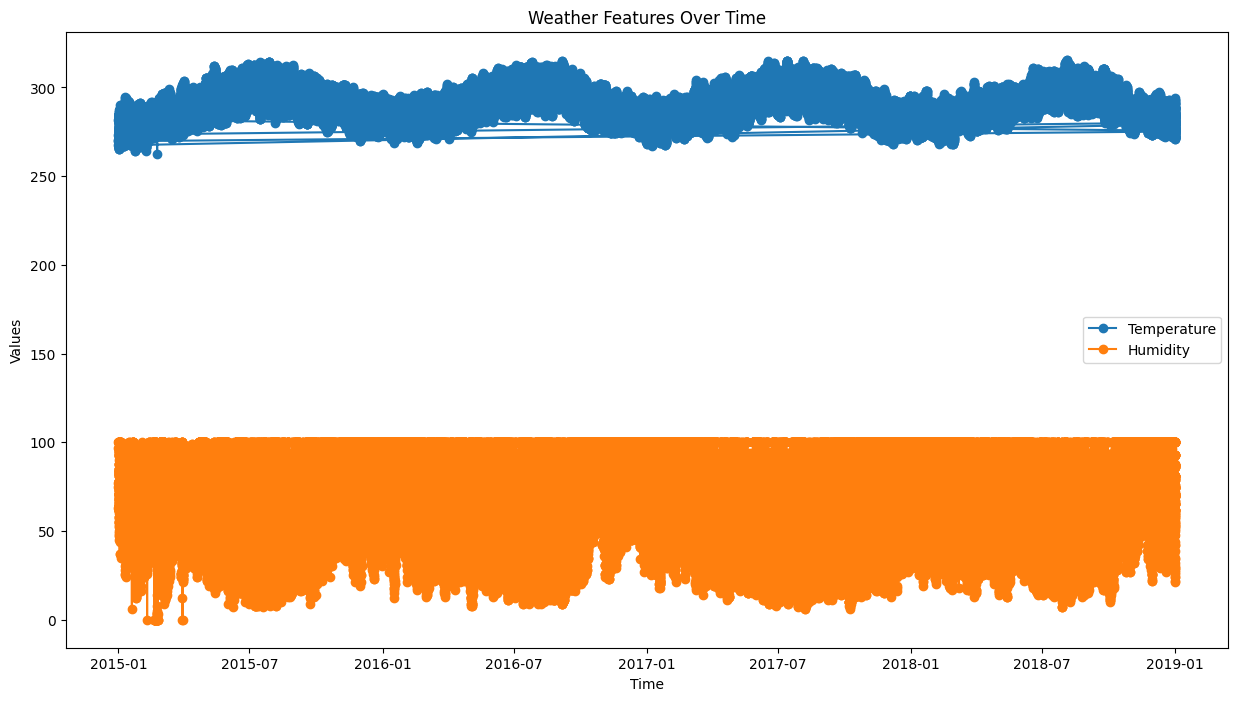

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df2['time'], df2['temp'], label='Temperature', marker='o')
plt.plot(df2['time'], df2['humidity'], label='Humidity', marker='o')
plt.title('Weather Features Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


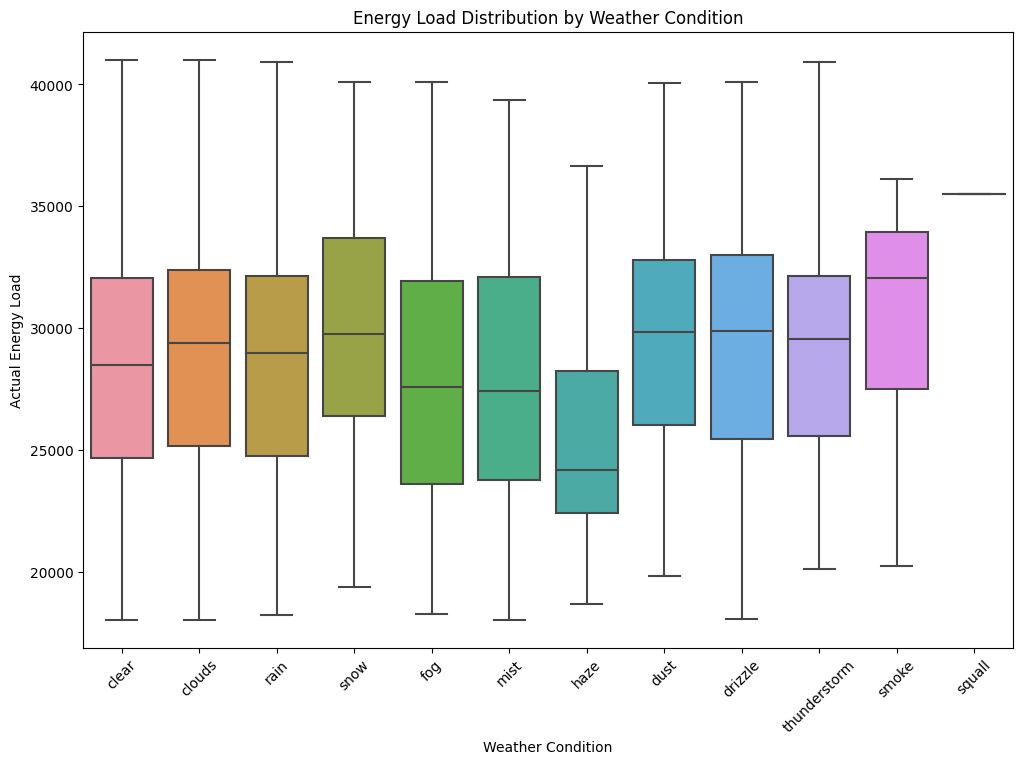

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='weather_main', y='total load actual', data=df)
plt.title('Energy Load Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Actual Energy Load')
plt.xticks(rotation=45)
plt.show()


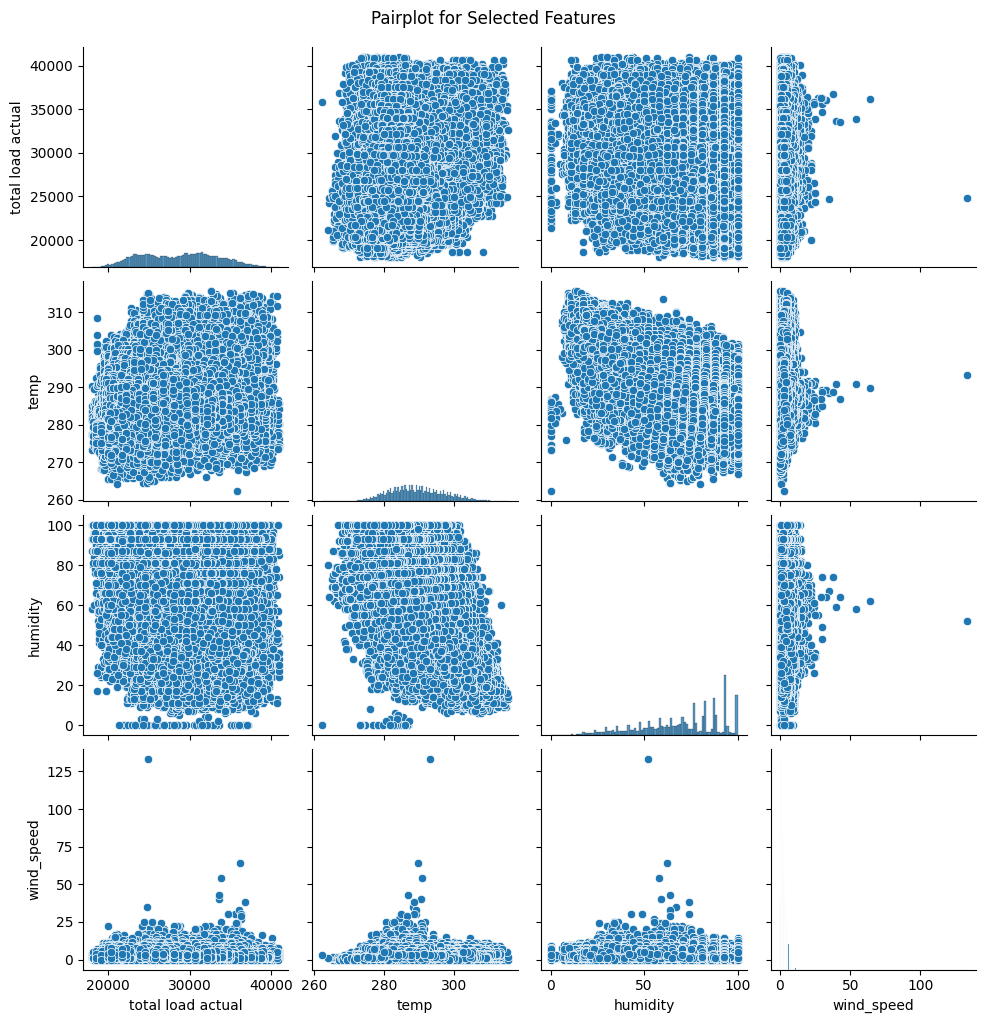

In [ ]:
sns.pairplot(df[['total load actual', 'temp', 'humidity', 'wind_speed']])
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()


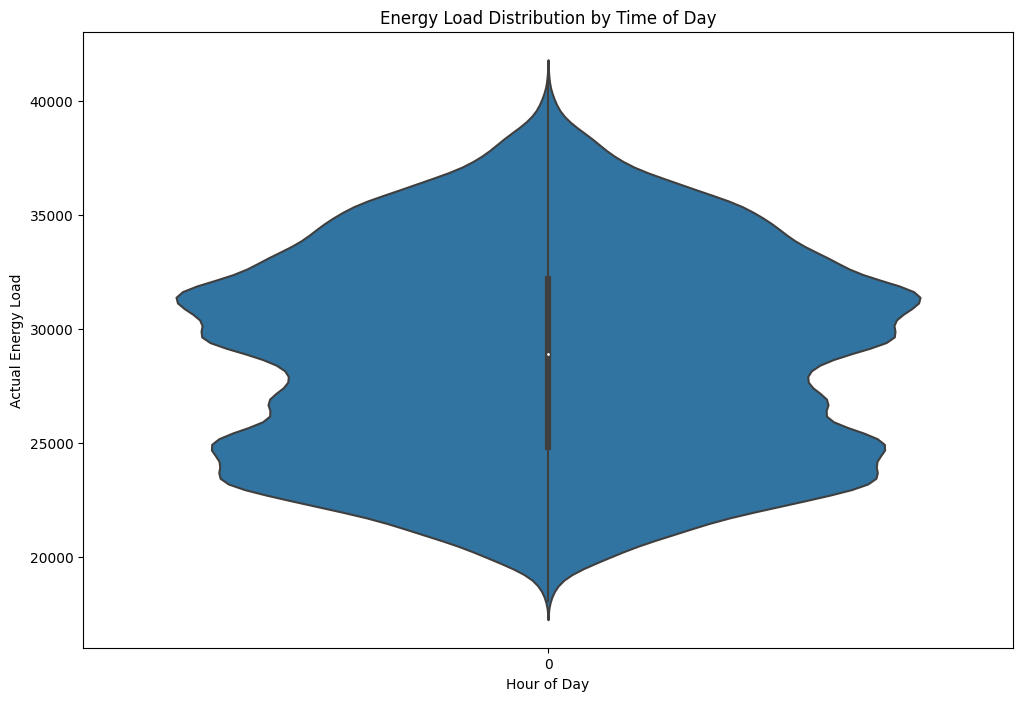

In [ ]:
df['hour'] = df.index.hour

plt.figure(figsize=(12, 8))
sns.violinplot(x='hour', y='total load actual', data=df)
plt.title('Energy Load Distribution by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Actual Energy Load')
plt.show()


In [50]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [68]:
df['time'].unique()

array([datetime.datetime(2015, 1, 1, 0, 0, tzinfo=tzoffset(None, 3600)),
       datetime.datetime(2015, 1, 1, 1, 0, tzinfo=tzoffset(None, 3600)),
       datetime.datetime(2015, 1, 1, 2, 0, tzinfo=tzoffset(None, 3600)),
       ...,
       datetime.datetime(2018, 12, 31, 21, 0, tzinfo=tzoffset(None, 3600)),
       datetime.datetime(2018, 12, 31, 22, 0, tzinfo=tzoffset(None, 3600)),
       datetime.datetime(2018, 12, 31, 23, 0, tzinfo=tzoffset(None, 3600))],
      dtype=object)

Epoch 1/50
4460/4460 [==============================] - 46s 10ms/step - loss: 0.0109 - val_loss: 0.0095
Epoch 2/50
4460/4460 [==============================] - 44s 10ms/step - loss: 0.0081 - val_loss: 0.0087
Epoch 3/50
4460/4460 [==============================] - 43s 10ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 4/50
4460/4460 [==============================] - 43s 10ms/step - loss: 0.0074 - val_loss: 0.0083
Epoch 5/50
4460/4460 [==============================] - 43s 10ms/step - loss: 0.0069 - val_loss: 0.0076
Epoch 6/50
4460/4460 [==============================] - 44s 10ms/step - loss: 0.0066 - val_loss: 0.0074
Epoch 7/50
4460/4460 [==============================] - 44s 10ms/step - loss: 0.0065 - val_loss: 0.0073
Epoch 8/50
4460/4460 [==============================] - 42s 9ms/step - loss: 0.0064 - val_loss: 0.0074
Epoch 9/50
4460/4460 [==============================] - 44s 10ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 10/50
4460/4460 [==============================] - 45s 10ms

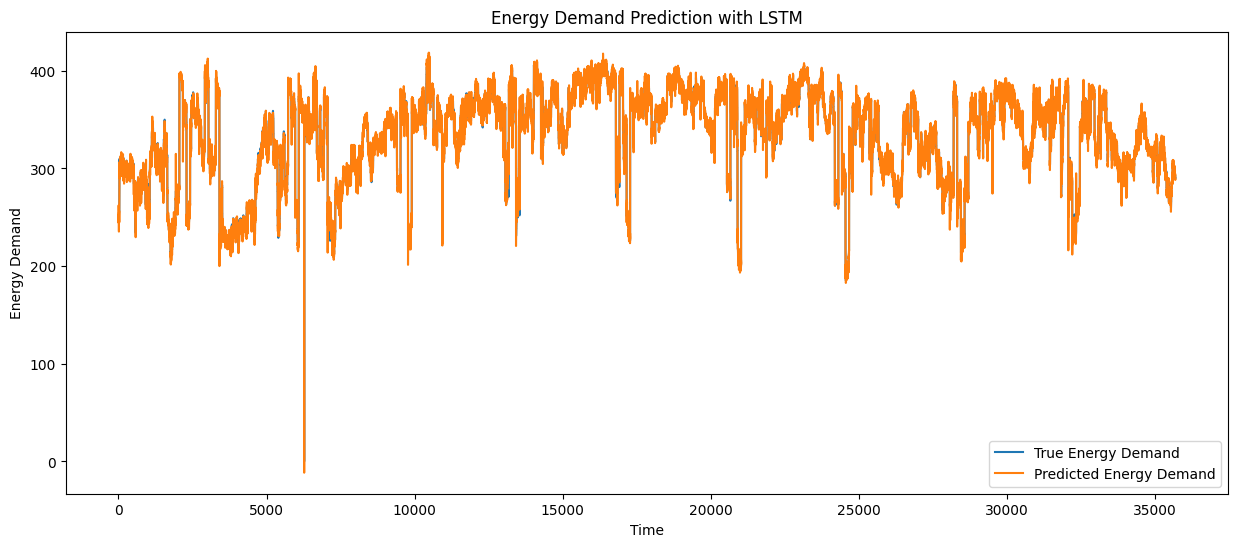

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have a DataFrame named 'df' with columns: time, generation biomass, ..., temp, humidity, wind_speed, ...

# Select relevant columns for analysis
energy_columns = ['generation biomass', 'generation fossil brown coal/lignite',
                  'generation fossil coal-derived gas', 'generation fossil gas',
                  'generation fossil hard coal', 'generation fossil oil',
                  'generation fossil oil shale', 'generation fossil peat',
                  'generation geothermal', 'generation hydro pumped storage aggregated',
                  'generation hydro pumped storage consumption',
                  'generation hydro run-of-river and poundage',
                  'generation hydro water reservoir', 'generation marine',
                  'generation nuclear', 'generation other', 'generation other renewable',
                  'generation solar', 'generation waste', 'generation wind offshore',
                  'generation wind onshore']
weather_columns = ['temp','pressure', 'humidity', 'wind_speed','wind_deg','rain_3h','snow_3h','clouds_all','weather_main_encoded', 'weather_description_encoded']

# Extract relevant data
data = df[energy_columns + weather_columns].copy()

# Data preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define function to create input sequences and labels
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Hyperparameters
sequence_length = 10  # You can adjust this based on the desired context window
epochs = 50
batch_size = 32

# Create input sequences and labels
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, X.shape[2])))
model.add(Dense(X.shape[2]))  # Output layer with the same number of features
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get predictions in original scale
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Visualize results
plt.figure(figsize=(15, 6))
plt.plot(y_test_original_scale[:, 0], label='True Energy Demand')
plt.plot(predictions_original_scale[:, 0], label='Predicted Energy Demand')
plt.legend()
plt.title('Energy Demand Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Energy Demand')
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming predictions_original_scale and y_test_original_scale are available

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original_scale, predictions_original_scale)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original_scale, predictions_original_scale)
print(f'Mean Absolute Error: {mae}')

# You may also calculate other metrics such as R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original_scale, predictions_original_scale)
print(f'R2 Score: {r2}')

Mean Squared Error: 16703.66544858466
Root Mean Squared Error: 129.24266110145155
Mean Absolute Error: 39.643293412415545
R2 Score: 0.9957342618612083


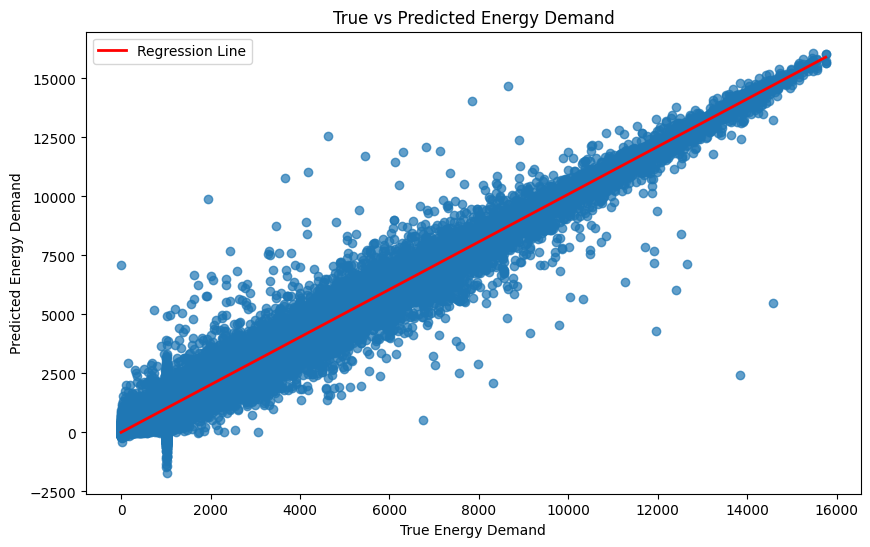

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming predictions_original_scale and y_test_original_scale are available

# Ensure both arrays have the same size
min_size = min(len(y_test_original_scale), len(predictions_original_scale))
y_test_original_scale = y_test_original_scale[:min_size].ravel()
predictions_original_scale = predictions_original_scale[:min_size].ravel()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original_scale, predictions_original_scale, alpha=0.7)
plt.title('True vs Predicted Energy Demand')
plt.xlabel('True Energy Demand')
plt.ylabel('Predicted Energy Demand')

# Fit a regression line
regression_line = LinearRegression()
regression_line.fit(y_test_original_scale.reshape(-1, 1), predictions_original_scale)
x_values = np.linspace(min(y_test_original_scale), max(y_test_original_scale), 100)
y_values = regression_line.predict(x_values.reshape(-1, 1))

# Plot the regression line
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.show()

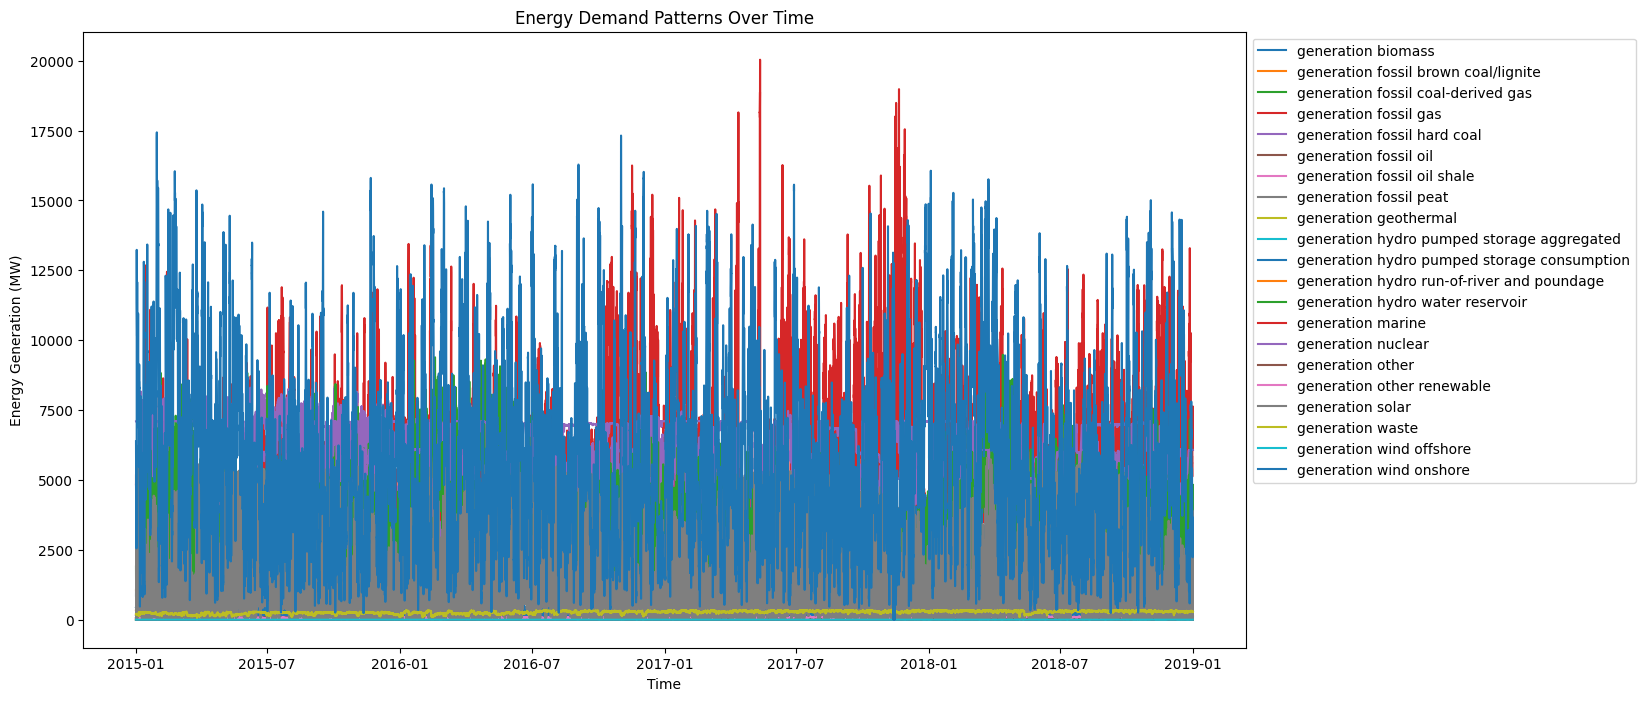

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns: time, generation biomass, ..., generation wind onshore

# Select relevant columns for energy demand patterns
time_column = 'time'
energy_columns = ['generation biomass', 'generation fossil brown coal/lignite',
                   'generation fossil coal-derived gas', 'generation fossil gas',
                   'generation fossil hard coal', 'generation fossil oil',
                   'generation fossil oil shale', 'generation fossil peat',
                   'generation geothermal', 'generation hydro pumped storage aggregated',
                   'generation hydro pumped storage consumption',
                   'generation hydro run-of-river and poundage',
                   'generation hydro water reservoir', 'generation marine',
                   'generation nuclear', 'generation other', 'generation other renewable',
                   'generation solar', 'generation waste', 'generation wind offshore',
                   'generation wind onshore']

# Plot energy demand patterns for different energy sources
plt.figure(figsize=(15, 8))

for column in energy_columns:
    plt.plot(df[time_column], df[column], label=column)

plt.title('Energy Demand Patterns Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Generation (MW)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have a DataFrame named 'df' with columns: time, generation biomass, ..., temp, humidity, wind_speed, ...
# Select relevant columns
energy_columns = ['generation biomass', 'generation fossil brown coal/lignite',
                   'generation fossil coal-derived gas', 'generation fossil gas',
                   'generation fossil hard coal']
weather_columns = ['temp','pressure', 'humidity', 'wind_speed','wind_deg','rain_3h','snow_3h','clouds_all','weather_main_encoded', 'weather_description_encoded']

# Extract relevant data for the specific date (e.g., January 1, 2015)
selected_date = '2015-01-01'


# If the above line causes an error, try the following alternative:
selected_data = df[df['time'].apply(lambda x: x.date()) == pd.to_datetime(selected_date).date()]

# Combine energy and weather data for the selected date
selected_data = selected_data[energy_columns + weather_columns].values

# Data preprocessing
scaler = MinMaxScaler()
selected_data_scaled = scaler.fit_transform(selected_data)

# Define function to create input sequences
def create_input_sequence(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

# Hyperparameter (you may need to adjust based on your model)
sequence_length = 10

# Create input sequence for the selected date
input_sequence = create_input_sequence(selected_data_scaled, sequence_length)

# Reshape input data for LSTM
input_sequence = input_sequence.reshape((input_sequence.shape[0], input_sequence.shape[1], input_sequence.shape[2]))

# Build the LSTM model (you may use the previously trained model)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, input_sequence.shape[2])))
model.add(Dense(input_sequence.shape[2]))  # Output layer with the same number of features
model.compile(optimizer='adam', loss='mse')

# Make predictions for each energy source
energy_demand_predictions = model.predict(input_sequence)

# Inverse transform to get predictions in the original scale
energy_demand_predictions_original_scale = scaler.inverse_transform(energy_demand_predictions)

# Display predictions
for i, column in enumerate(energy_columns):
    predicted_demand = energy_demand_predictions_original_scale[:, i]
    print(f'Predicted {column} demand on {selected_date}: {predicted_demand[0]:.2f} MW')

4/4 [==============================] - 1s 6ms/step
Predicted generation biomass demand on 2015-01-01: 402.39 MW
Predicted generation fossil brown coal/lignite demand on 2015-01-01: 209.21 MW
Predicted generation fossil coal-derived gas demand on 2015-01-01: 0.01 MW
Predicted generation fossil gas demand on 2015-01-01: 3911.23 MW
Predicted generation fossil hard coal demand on 2015-01-01: 3841.12 MW


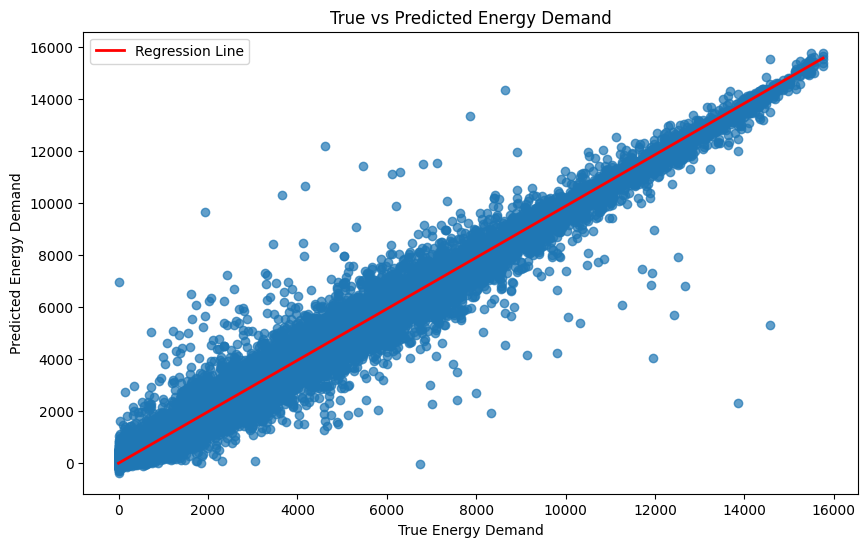

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming predictions_original_scale and y_test_original_scale are available

# Ensure both arrays have the same size
min_size = min(len(y_test_original_scale), len(predictions_original_scale))
y_test_original_scale = y_test_original_scale[:min_size].ravel()
predictions_original_scale = predictions_original_scale[:min_size].ravel()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original_scale, predictions_original_scale, alpha=0.7)
plt.title('True vs Predicted Energy Demand')
plt.xlabel('True Energy Demand')
plt.ylabel('Predicted Energy Demand')

# Fit a regression line
regression_line = LinearRegression()
regression_line.fit(y_test_original_scale.reshape(-1, 1), predictions_original_scale)
x_values = np.linspace(min(y_test_original_scale), max(y_test_original_scale), 100)
y_values = regression_line.predict(x_values.reshape(-1, 1))

# Plot the regression line
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.show()



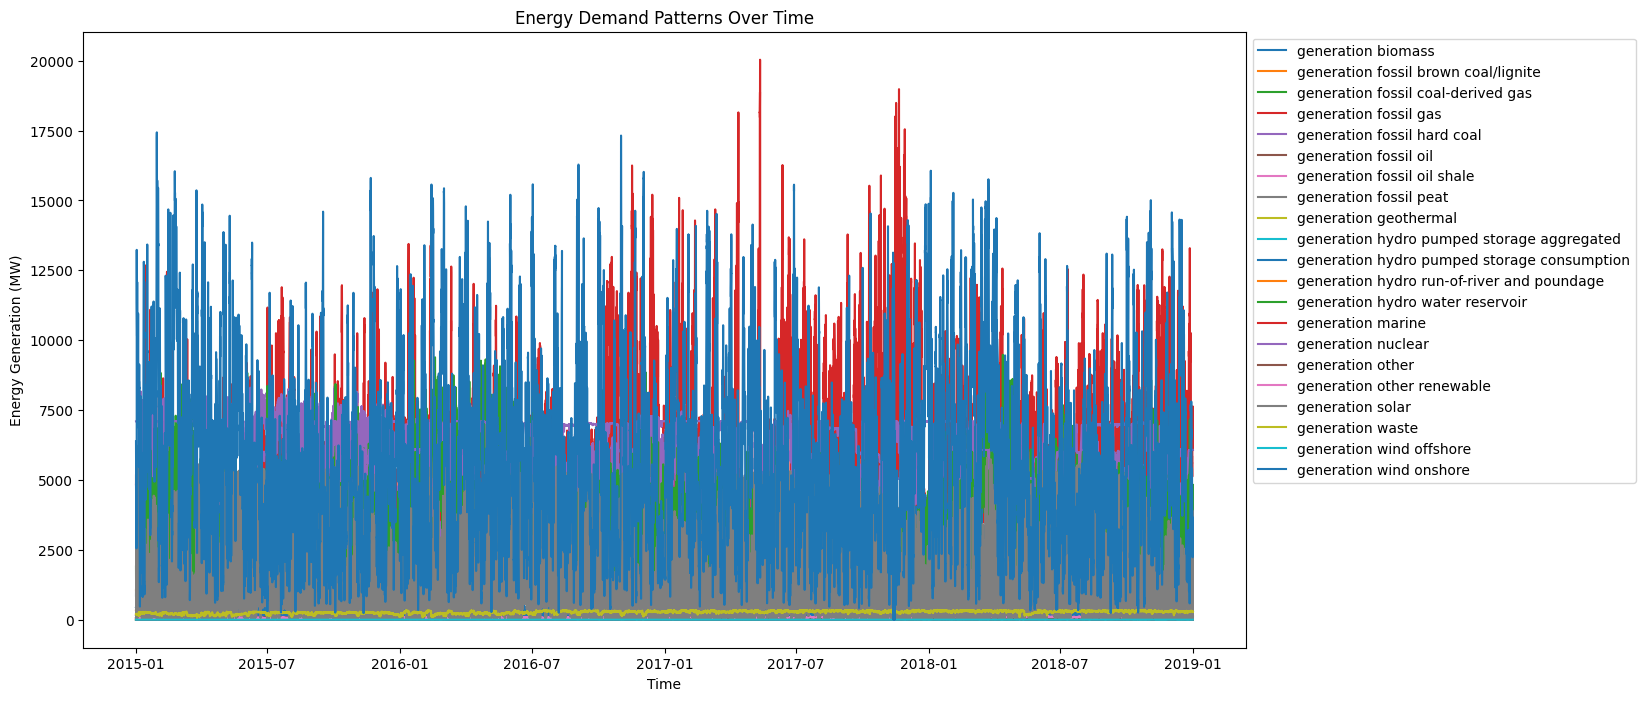

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns: time, generation biomass, ..., generation wind onshore

# Select relevant columns for energy demand patterns
time_column = 'time'
energy_columns = ['generation biomass', 'generation fossil brown coal/lignite',
                   'generation fossil coal-derived gas', 'generation fossil gas',
                   'generation fossil hard coal', 'generation fossil oil',
                   'generation fossil oil shale', 'generation fossil peat',
                   'generation geothermal', 'generation hydro pumped storage aggregated',
                   'generation hydro pumped storage consumption',
                   'generation hydro run-of-river and poundage',
                   'generation hydro water reservoir', 'generation marine',
                   'generation nuclear', 'generation other', 'generation other renewable',
                   'generation solar', 'generation waste', 'generation wind offshore',
                   'generation wind onshore']

# Plot energy demand patterns for different energy sources
plt.figure(figsize=(15, 8))

for column in energy_columns:
    plt.plot(df[time_column], df[column], label=column)

plt.title('Energy Demand Patterns Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Generation (MW)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


4/4 [==============================] - 0s 4ms/step


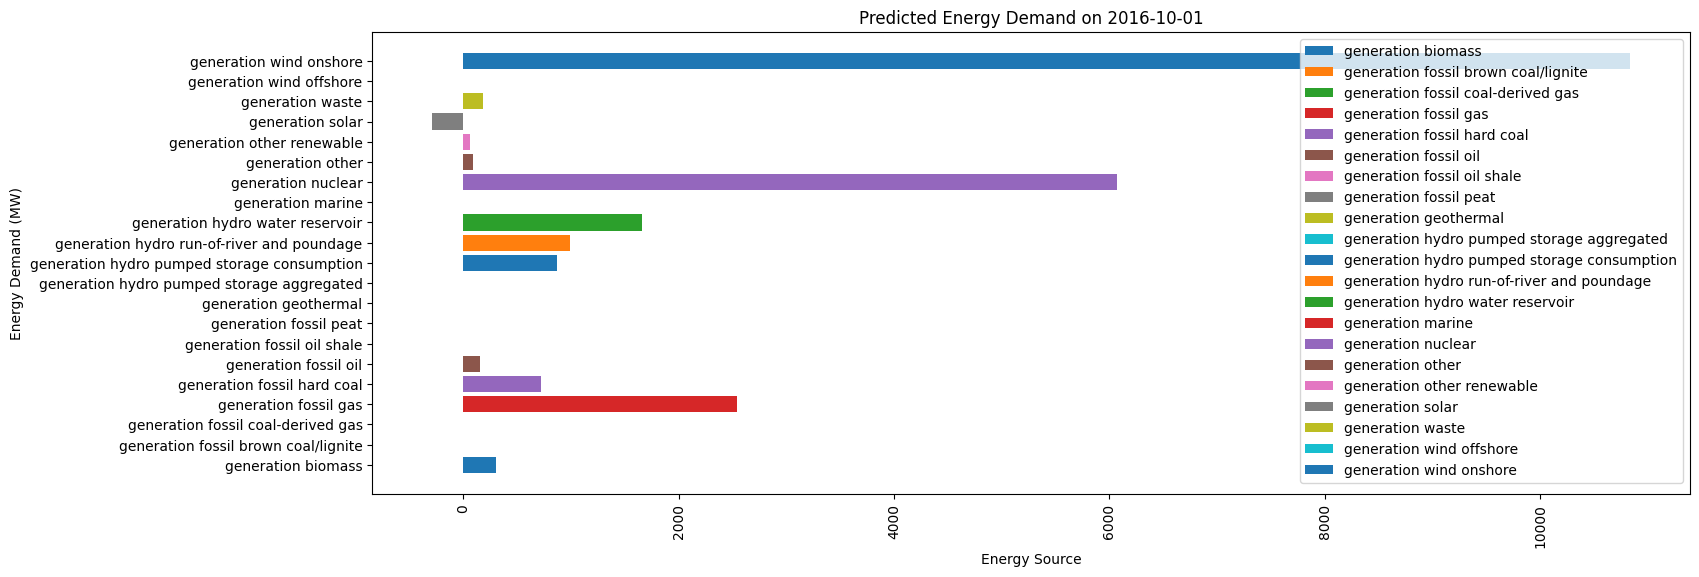

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have a DataFrame named 'df' with columns: time, generation biomass, ..., temp, humidity, wind_speed, ...
# Select relevant columns
energy_columns = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', ]
weather_columns = ['temp', 'humidity', 'wind_speed']

# Extract relevant data for the specific date (e.g., January 1, 2015)
selected_date = '2016-10-01'


# If the above line causes an error, try the following alternative:
selected_data = df[df['time'].apply(lambda x: x.date()) == pd.to_datetime(selected_date).date()]

# Combine energy and weather data for the selected date
selected_data = selected_data[energy_columns + weather_columns].values

# Data preprocessing
scaler = MinMaxScaler()
selected_data_scaled = scaler.fit_transform(selected_data)

# Define function to create input sequences
def create_input_sequence(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

# Hyperparameter (you may need to adjust based on your model)
sequence_length = 10

# Create input sequence for the selected date
input_sequence = create_input_sequence(selected_data_scaled, sequence_length)

# Reshape input data for LSTM
input_sequence = input_sequence.reshape((input_sequence.shape[0], input_sequence.shape[1], input_sequence.shape[2]))

# Build the LSTM model (you may use the previously trained model)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, input_sequence.shape[2])))
model.add(Dense(input_sequence.shape[2]))  # Output layer with the same number of features
model.compile(optimizer='adam', loss='mse')

# Make predictions for each energy source
energy_demand_predictions = model.predict(input_sequence)

# Inverse transform to get predictions in the original scale
energy_demand_predictions_original_scale = scaler.inverse_transform(energy_demand_predictions)

# Plot the results
plt.figure(figsize=(17, 6))
for i, column in enumerate(energy_columns):
    predicted_demand = energy_demand_predictions_original_scale[:, i]
    plt.barh(column, predicted_demand[0], label=column)

plt.title(f'Predicted Energy Demand on {selected_date}')
plt.xlabel('Energy Source')
plt.ylabel('Energy Demand (MW)')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend()
plt.show()

4/4 [==============================] - 0s 4ms/step


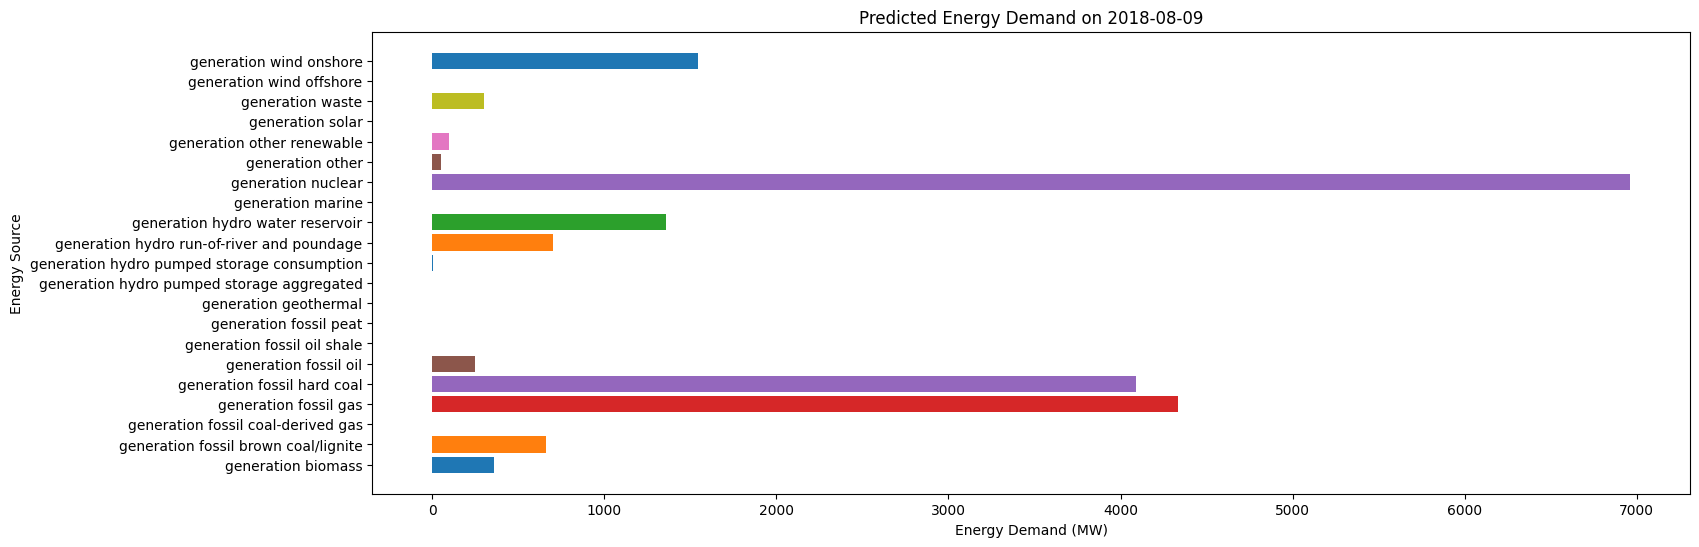

4/4 [==============================] - 0s 6ms/step


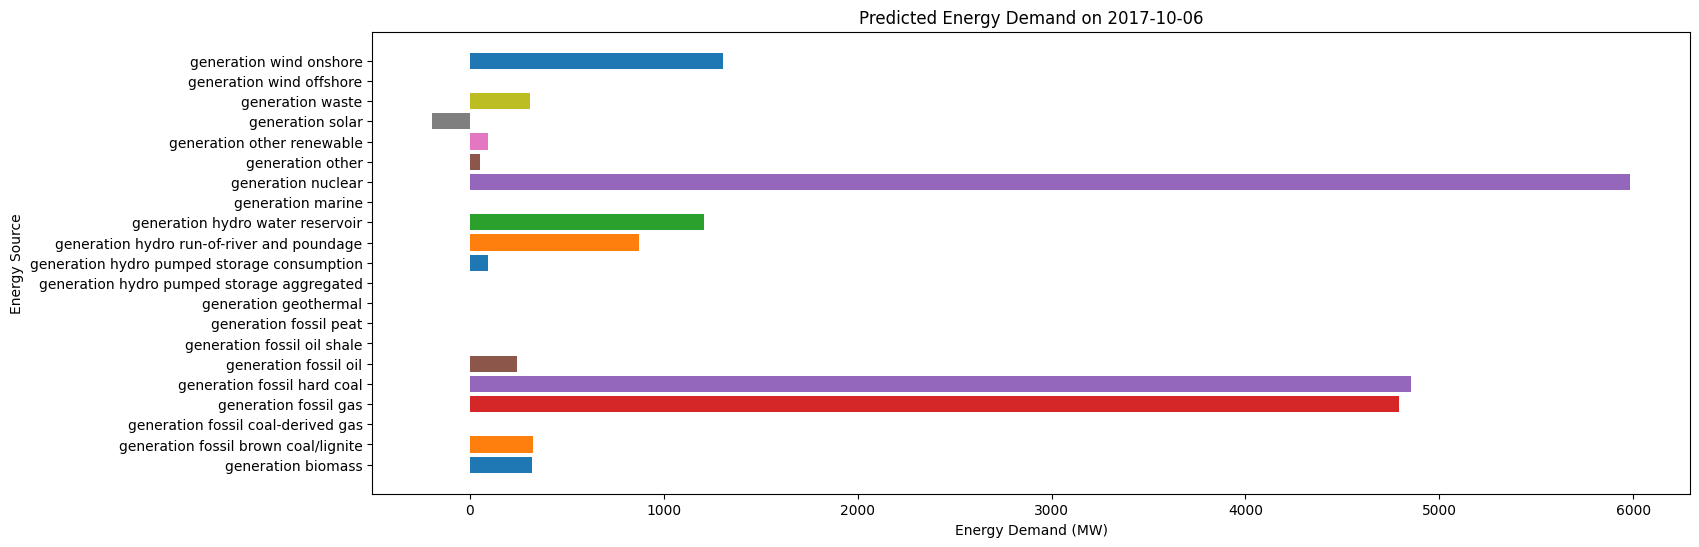

4/4 [==============================] - 0s 9ms/step


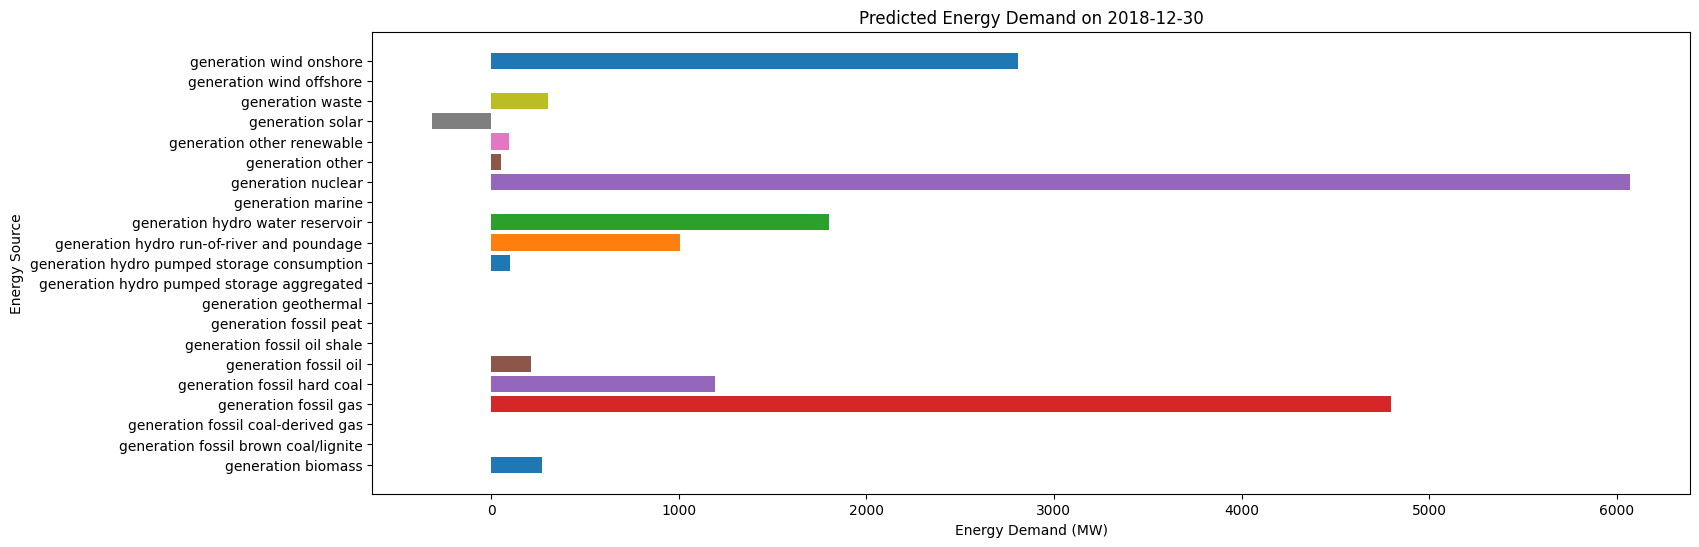

4/4 [==============================] - 0s 7ms/step


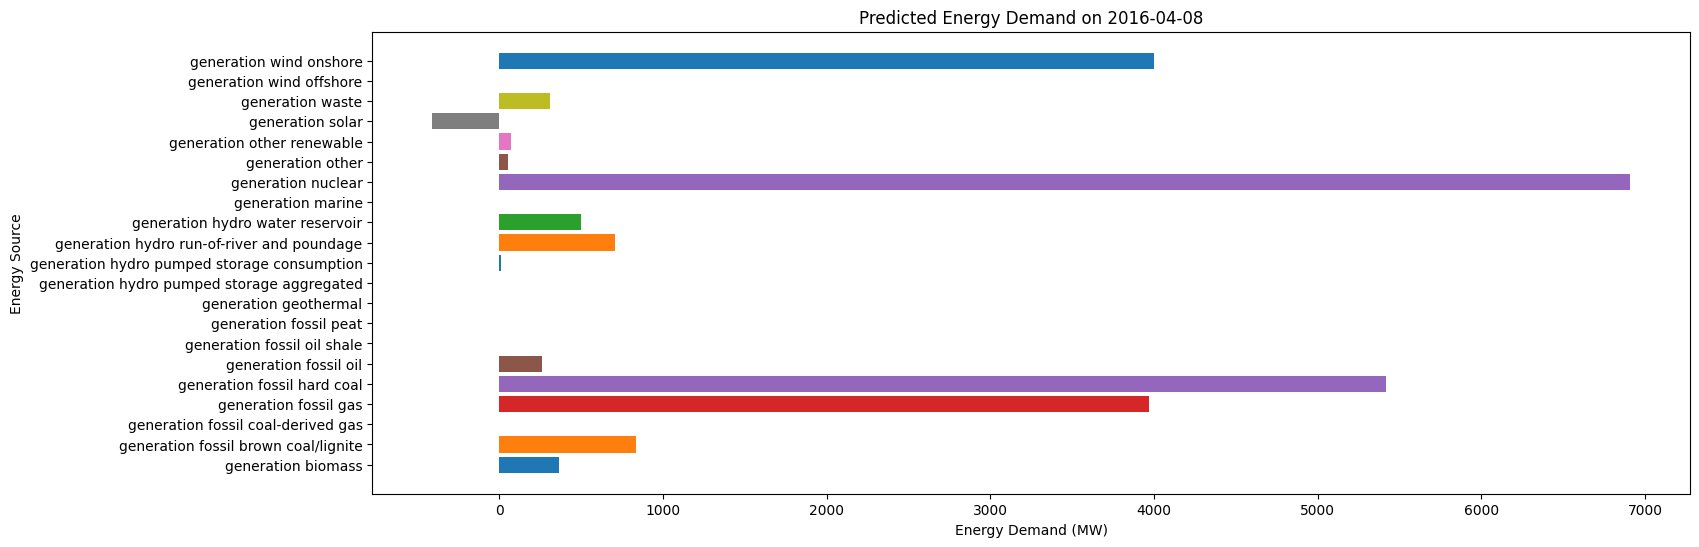

4/4 [==============================] - 0s 5ms/step


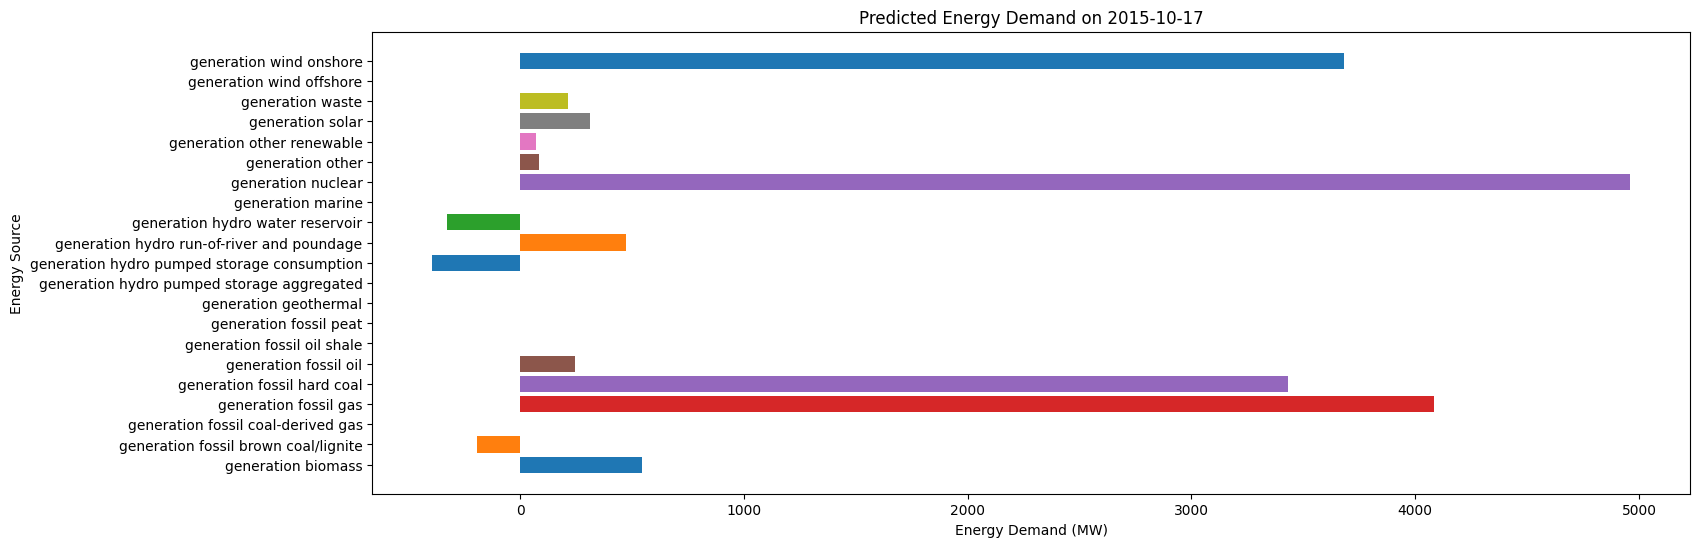

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define function to create input sequences
def create_input_sequence(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

# Assuming you have a DataFrame named 'df' with columns: time, generation biomass, ..., temp, humidity, wind_speed, ...
# Select relevant columns
energy_columns = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', ]
weather_columns = ['temp', 'humidity', 'wind_speed']

# Define the sequence length for LSTM
sequence_length = 10

# Randomly select 5 dates
random_dates = np.random.choice(df['time'].apply(lambda x: x.date()).unique(), 5, replace=False)

# Plot for each random date
for selected_date in random_dates:
    # Extract relevant data for the selected date
    selected_data = df[df['time'].apply(lambda x: x.date()) == selected_date]

    # Combine energy and weather data for the selected date
    selected_data = selected_data[energy_columns + weather_columns].values

    # Data preprocessing
    scaler = MinMaxScaler()
    selected_data_scaled = scaler.fit_transform(selected_data)

    # Create input sequence for the selected date
    input_sequence = create_input_sequence(selected_data_scaled, sequence_length)

    # Reshape input data for LSTM
    input_sequence = input_sequence.reshape((input_sequence.shape[0], input_sequence.shape[1], input_sequence.shape[2]))

    # Build the LSTM model (you may use the previously trained model)
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(sequence_length, input_sequence.shape[2])))
    model.add(Dense(input_sequence.shape[2]))  # Output layer with the same number of features
    model.compile(optimizer='adam', loss='mse')

    # Make predictions for each energy source
    energy_demand_predictions = model.predict(input_sequence)

    # Inverse transform to get predictions in the original scale
    energy_demand_predictions_original_scale = scaler.inverse_transform(energy_demand_predictions)

    # Plot the results
    plt.figure(figsize=(17, 6))
    for i, column in enumerate(energy_columns):
        predicted_demand = energy_demand_predictions_original_scale[:, i]
        plt.barh(column, predicted_demand[0], label=column)

    plt.title(f'Predicted Energy Demand on {selected_date}')
    plt.xlabel('Energy Demand (MW)')
    plt.ylabel('Energy Source')
    plt.show()
